In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('final dataset.csv')

In [3]:
data = data.drop_duplicates()

In [4]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,5] = le.fit_transform(x[:,5])
x[:,7] = le.fit_transform(x[:,7])
x[:,12] = le.fit_transform(x[:,12])
x[:,13] = le.fit_transform(x[:,13])
y = le.fit_transform(y)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x= scaler.fit_transform(x)

/home/turjoy/anaconda3/envs/Arafat/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
     x, y, test_size = 0.2, random_state = 100) 

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.recurrent import SimpleRNN
from keras.layers.recurrent import LSTM 
from keras.optimizers import Adam,RMSprop
from keras.utils import np_utils
from keras.layers import Activation

Using TensorFlow backend.


In [9]:
y_train_nn = np_utils.to_categorical(y_train, 5)
y_test_nn = np_utils.to_categorical(y_test, 5)

In [10]:
x_train_nn = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test_nn = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [13]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(32, input_shape = (1,27), return_sequences=True,
                 activation='tanh',
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 recurrent_initializer='orthogonal',
                 bias_initializer='zeros',
                 kernel_regularizer=None,
                 recurrent_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 recurrent_constraint=None,
                 bias_constraint=None,
                 dropout=0.,
                 recurrent_dropout=0.,
                 return_state=False,
                 go_backwards=False,
                 stateful=False,
                 unroll=False,))
rnn_model.add(Dropout(0.4))
rnn_model.add(SimpleRNN(32,activation='tanh',return_sequences=False))
rnn_model.add(Dropout(0.4))
rnn_model.add(Dense(units = 5,activation='softmax'))
rnn_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999,
                 epsilon=None, decay=0., amsgrad=False), metrics=['accuracy'])
print(rnn_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 1, 32)             1920      
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 4,165
Trainable params: 4,165
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
rnn_model.fit(x_train_nn, y_train_nn, validation_data = (x_test_nn, y_test_nn), epochs = 5, batch_size = 50)

Train on 838860 samples, validate on 209715 samples
Epoch 1/5
838860/838860 [==============================] - 118s 141us/step - loss: 0.0974 - acc: 0.9838 - val_loss: 0.0818 - val_acc: 0.9861
Epoch 2/5
838860/838860 [==============================] - 116s 138us/step - loss: 0.0884 - acc: 0.9857 - val_loss: 0.0809 - val_acc: 0.9862
Epoch 3/5
838860/838860 [==============================] - 127s 151us/step - loss: 0.0873 - acc: 0.9859 - val_loss: 0.0805 - val_acc: 0.9864
Epoch 4/5
838860/838860 [==============================] - 129s 154us/step - loss: 0.0866 - acc: 0.9860 - val_loss: 0.0798 - val_acc: 0.9865
Epoch 5/5
838860/838860 [==============================] - 133s 159us/step - loss: 0.0863 - acc: 0.9861 - val_loss: 0.0801 - val_acc: 0.9865


In [15]:
metrics = rnn_model.evaluate(x_test_nn, y_test_nn, verbose=1)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

209715/209715 [==============================] - 11s 51us/step
Metrics(Test loss & Test Accuracy): 
[0.08006045218742128, 0.9865054955534892]


In [17]:
import pylab as pl

[[   357      2     21      0      0]
 [     5 187819     24      0      0]
 [     0     40    567      0      0]
 [     6    800     33    404      0]
 [     0   1899      0      0  17738]]


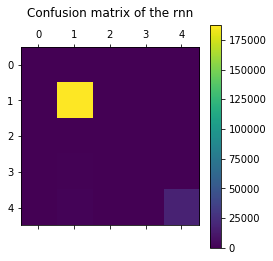

In [18]:
from sklearn.metrics import confusion_matrix
y_expect = y_test_nn
y_expect = np.argmax(y_expect, axis=1)
y_predict = rnn_model.predict(x_test_nn)
y_predict = np.argmax(y_predict, axis=1)
cm = confusion_matrix(y_expect, y_predict)
pl.matshow(cm)
print (cm)
pl.title('Confusion matrix of the rnn\n')
pl.colorbar()
pl.show()

In [37]:
import matplotlib.pyplot as plt

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_expect,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       380
           1       0.99      1.00      0.99    187848
           2       0.88      0.93      0.91       607
           3       1.00      0.33      0.49      1243
           4       1.00      0.90      0.95     19637

   micro avg       0.99      0.99      0.99    209715
   macro avg       0.97      0.82      0.86    209715
weighted avg       0.99      0.99      0.99    209715



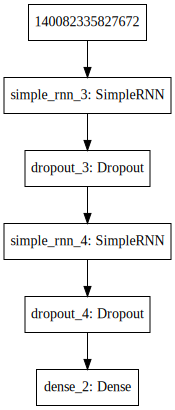

In [20]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(rnn_model).create(prog='dot', format='svg'))

In [39]:
from keras.utils import plot_model
plot_model(rnn_model,show_shapes=True,rankdir='TB',to_file='model.png')

In [21]:
y_train_lstm = np_utils.to_categorical(y_train, 5)
y_test_lstm = np_utils.to_categorical(y_test, 5)

In [22]:
x_train_lstm = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test_lstm = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [23]:
data_dim = 27
timesteps = 1
model = Sequential()
model.add(LSTM(30, return_sequences=True,
               input_shape=(timesteps, data_dim),activation='tanh',
                 recurrent_activation='hard_sigmoid',
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 recurrent_initializer='orthogonal',
                 bias_initializer='zeros',
                 unit_forget_bias=True,
                 kernel_regularizer=None,
                 recurrent_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 recurrent_constraint=None,
                 bias_constraint=None,
                 dropout=0.,
                 recurrent_dropout=0.,
                 implementation=1,
                 return_state=False,
                 go_backwards=False,
                 stateful=False,
                 unroll=False,))  # returns a sequence of vectors of dimension 30
model.add(LSTM(30, return_sequences=True))  # returns a sequence of vectors of dimension 30
model.add(LSTM(30))  # return a single vector of dimension 30
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 30)             6960      
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 30)             7320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 155       
Total params: 21,755
Trainable params: 21,755
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x_train_lstm, y_train_lstm,validation_data = (x_test_lstm, y_test_lstm), batch_size = 50, epochs = 5, verbose = 1)

Train on 838860 samples, validate on 209715 samples
Epoch 1/5
838860/838860 [==============================] - 307s 365us/step - loss: 0.0898 - acc: 0.9842 - val_loss: 0.0800 - val_acc: 0.9863
Epoch 2/5
838860/838860 [==============================] - 336s 401us/step - loss: 0.0817 - acc: 0.9861 - val_loss: 0.0819 - val_acc: 0.9864
Epoch 3/5
838860/838860 [==============================] - 339s 404us/step - loss: 0.0828 - acc: 0.9861 - val_loss: 0.0820 - val_acc: 0.9864
Epoch 4/5
838860/838860 [==============================] - 308s 367us/step - loss: 0.0830 - acc: 0.9862 - val_loss: 0.0819 - val_acc: 0.9865
Epoch 5/5
838860/838860 [==============================] - 332s 396us/step - loss: 0.0839 - acc: 0.9862 - val_loss: 0.0818 - val_acc: 0.9864


In [25]:
metrics = model.evaluate(x_test_lstm, y_test_lstm, verbose=1)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

209715/209715 [==============================] - 19s 90us/step
Metrics(Test loss & Test Accuracy): 
[0.0818196652919593, 0.9864101280308991]


[[   342      3     23     12      0]
 [     7 187815     23      3      0]
 [     0     40    567      0      0]
 [     6    800     33    404      0]
 [     0   1900      0      0  17737]]


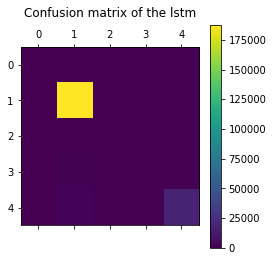

In [26]:
y_expect_ls = y_test_nn
y_expect_ls = np.argmax(y_expect_ls, axis=1)
y_predict_ls = model.predict(x_test_nn)
y_predict_ls = np.argmax(y_predict_ls, axis=1)
cm = confusion_matrix(y_expect_ls, y_predict_ls)
pl.matshow(cm)
print (cm)
pl.title('Confusion matrix of the lstm\n')
pl.colorbar()
pl.show()

In [27]:
print(classification_report(y_expect_ls,y_predict_ls))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       380
           1       0.99      1.00      0.99    187848
           2       0.88      0.93      0.91       607
           3       0.96      0.33      0.49      1243
           4       1.00      0.90      0.95     19637

   micro avg       0.99      0.99      0.99    209715
   macro avg       0.96      0.81      0.85    209715
weighted avg       0.99      0.99      0.99    209715



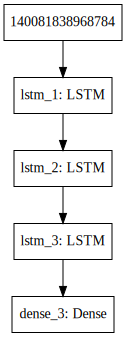

In [28]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [36]:
from keras.utils import plot_model
plot_model(model,show_shapes=True,rankdir='TB',to_file='lstm.png')